# Basic Image Classification : Classification of Images of Clothing

Using Neural Network to classify images

Reference: https://www.tensorflow.org/tutorials/keras/classification

### Importing Libraries

In [2]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
print(tf.__version__)

C:\Users\KIIT\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\KIIT\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\KIIT\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\KIIT\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passing (

1.14.0


### Importing the fashion MNIST data

In [3]:
fashion_mnist = keras.datasets.fashion_mnist

### Loading the dataset

Loading the dataset returns four NumPy Arrays, train_images and train_labels for training set and test_images and test_labels for testing set.
The images are 28x28 NumPy arrays.
The labels are an array of integers ranging from 0 to 9.

Tshirt/top - 0

Trouser - 1

Pullover - 2

Dress - 3

Coat - 4

Sandal - 5

Shirt - 6

Sneaker - 7

Bag - 8

Ankle Boot - 9

In [4]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 23s 5us/step


Storing the class names as it is not given in the dataset.

In [5]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle Boot']

### Exploring the Data

In [6]:
train_images.shape

(60000, 28, 28)

This shows that we have 60000 images in the training set and each image is represented as 28 x 28 pixels.

In [7]:
len(train_labels)

60000

This shows that we again have 60000 labels in training set.

In [8]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

This shows that each label is an integer between 0 to 9.

In [9]:
test_images.shape

(10000, 28, 28)

This shows that we have 10000 images in the testing set ans each image is represented as 28 x 28 pixels.

In [10]:
len(test_labels)

10000

This shows that we again have 10000 labels in testing set.

### Data Preprocessing

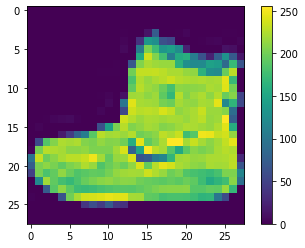

In [11]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

Inspecting the first image in the training set we see that the pixel values fall in the range of 0 to 255.

Now, scaling these values to a range of 0 to 1 by dividing the values by 255. It is necessary to scale the values before feeding them to neural nets. Again, it is important that the training set and the testing set must be scaled in the same way.

In [12]:
train_images = train_images / 255.0
test_images = test_images / 255.0

To verify that the data is in correct format, displaying the first 25 images from training set and displaying the class name below each image.

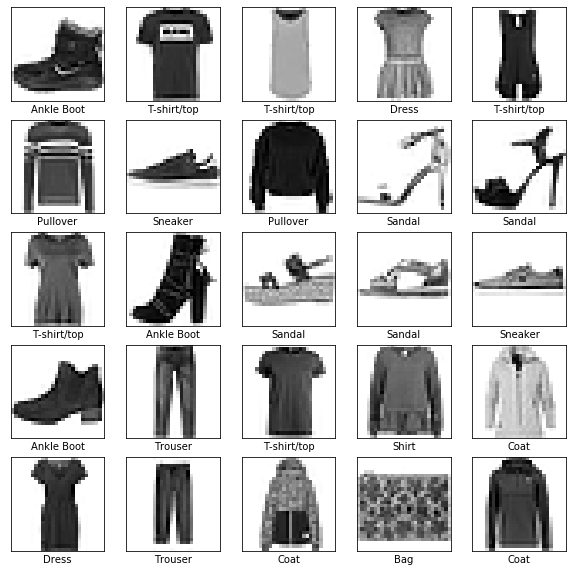

In [13]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap = plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

### Building The Model

In [14]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation = 'relu'),
    keras.layers.Dense(10)
])

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


The first layer tf.keras.layers.Flatten transforms the format of the image from 2D array(28 x x28) to 1D array(28*28=784 pixels).

After flattening the pixels, there are two Dense or fully connected neural layers.

The first Dense layer has 128 nodes, and the second layer returns a logits array with length of 10.Each node contains a score that indicates the current image belongs to one of the 10 classes.

### Compiling the Model

Before model is ready for training, it requires few more settings:
    
    1. Loss Function: This measures how accurate the model is during training. (Needs to be minimized)
    
    2. Optimizer: This is how the model is updated based on the data and it sees and its loss function.
        
    3. Metrics: Used to monitor the training and testing steps.

In [19]:
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

### Training the Model

Training steps:
    1. Feeding the data (train_images and train_labels)
    2. The model learns to associate images and labels
    3. Model is asked to make prediction on the test set (test_images)
    4. Verify the predictions with test_labels

#### Feeding the model

Using model.fit()

In [20]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
60000/60000 [==============================] - 6s 95us/sample - loss: 0.4969 - acc: 0.8257
Epoch 2/10
60000/60000 [==============================] - 5s 88us/sample - loss: 0.3755 - acc: 0.8656
Epoch 3/10
60000/60000 [==============================] - 5s 88us/sample - loss: 0.3368 - acc: 0.8774
Epoch 4/10
60000/60000 [==============================] - 5s 88us/sample - loss: 0.3127 - acc: 0.8847
Epoch 5/10
60000/60000 [==============================] - 5s 90us/sample - loss: 0.2954 - acc: 0.8912
Epoch 6/10
60000/60000 [==============================] - 5s 88us/sample - loss: 0.2803 - acc: 0.8957
Epoch 7/10
60000/60000 [==============================] - 5s 88us/sample - loss: 0.2663 - acc: 0.9001
Epoch 8/10
60000/60000 [==============================] - 5s 88us/sample - loss: 0.2551 - acc: 0.9042
Epoch 9/10
60000/60000 [==============================] - 5s 88us/sample - loss: 0.2489 - acc: 0.9072
Epoch 10/10
60000/60000 [==============================] - 5s 88us/sample - loss: 

Clearly, this model reaches an accuracy of about 91%

### Evaluating Acuuracy

In [22]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print("\nTest Accuracy: ", test_acc)

10000/10000 - 0s - loss: 0.3443 - acc: 0.8801

Test Accuracy:  0.8801


Clearly, the accuracy on the test data is less than the accuracy on the train data. This gap represents "OVERFITTING". 

### Making Predictions

We can use this trained model to make prediction about some images. Attaching a softmax layer to convert logits to probabilities.

In [25]:
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])

In [26]:
predictions = probability_model.predict(test_images)

Here, predictions stores the predicted results. Lets have a look at the first prediction made by the model.

In [27]:
predictions[0]

array([2.4331806e-07, 1.3724060e-09, 6.2389438e-10, 7.2822204e-10,
       1.7119611e-07, 2.0801212e-04, 3.1739253e-09, 8.8484567e-03,
       2.0758753e-07, 9.9094290e-01], dtype=float32)

Here the prediction is an array of 10 numbers which represent "confidence" that the image correponds to the 10 different labels. We can see which label has the highest confidence value.

In [28]:
np.argmax(predictions[0])

9

So, the model predicts it to be Ankle Boot (9), lets examine it.

In [30]:
test_labels[0]

9

Clearly, the prediction is correct.

Graphing this to look at the 10 class of predictions.

In [35]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

### Verifying Predictions

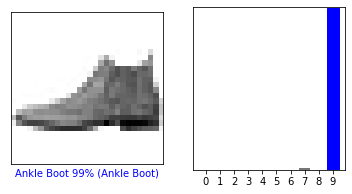

In [36]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

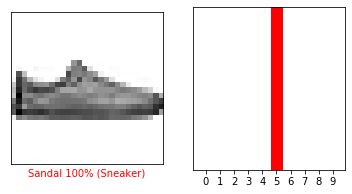

In [37]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

Plotting several images with predictions

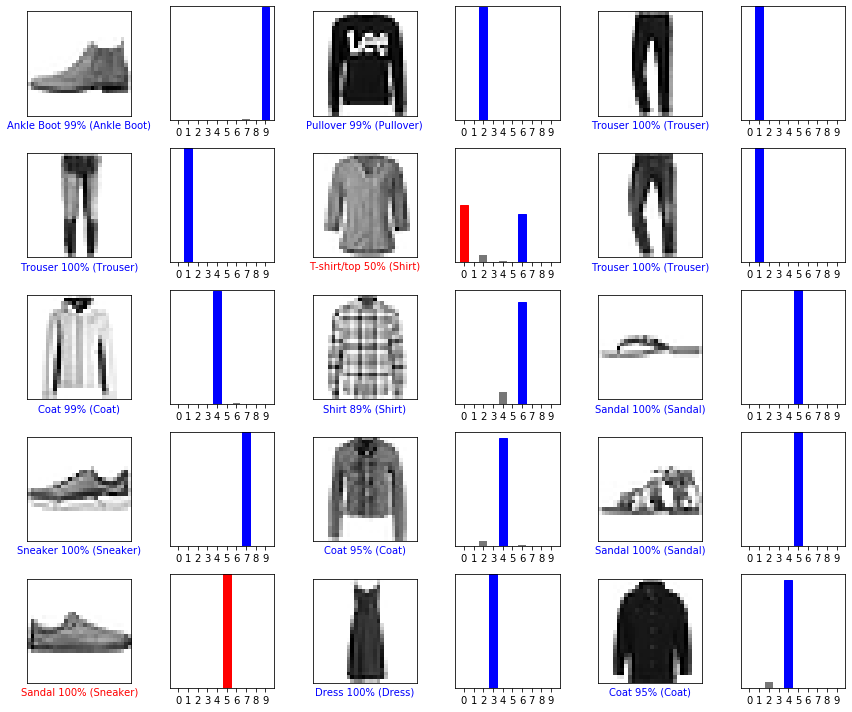

In [38]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

Now, using the trained model lets make prediction on a single image

In [39]:
img = test_images[1]
print(img.shape)

(28, 28)


Adding the image to a batch where its the only member

In [40]:
img = (np.expand_dims(img, 0))
print(img.shape)

(1, 28, 28)


In [41]:
predictions_single = probability_model.predict(img)
print(predictions_single)

[[2.3234055e-04 6.1746902e-15 9.9351454e-01 2.2061246e-09 5.9512290e-03
  1.4331874e-11 3.0192325e-04 8.2376746e-19 1.2897931e-11 1.3945155e-16]]


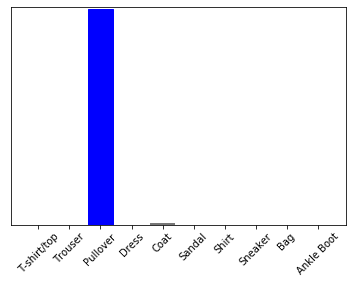

In [44]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [45]:
np.argmax(predictions_single[0])

2

The model predicts the label as expected.

In [46]:
#
# Copyright (c) 2017 François Chollet
#
# Permission is hereby granted, free of charge, to any person obtaining a
# copy of this software and associated documentation files (the "Software"),
# to deal in the Software without restriction, including without limitation
# the rights to use, copy, modify, merge, publish, distribute, sublicense,
# and/or sell copies of the Software, and to permit persons to whom the
# Software is furnished to do so, subject to the following conditions:
#
# The above copyright notice and this permission notice shall be included in
# all copies or substantial portions of the Software.
#
# THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
# IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
# FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL
# THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
# LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING
# FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER
# DEALINGS IN THE SOFTWARE.